## Load the train data and split it



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn import set_config
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


set_config(transform_output="pandas")

In [3]:
url = "https://drive.google.com/file/d/1c3XaTRGyN9Cy2Ffnb26DlfZowi3zxE2T/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
train_data = pd.read_csv(path)

In [4]:
train_data.drop_duplicates(inplace=True)
train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley' ], inplace=True)

X=train_data.drop("Id",axis=1)
y = X.pop("SalePrice")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

## Load the test data and pop the id column

In [5]:
url = "https://drive.google.com/file/d/1-fP60UWTyCb45r7vBrPOkU_LrE0TTn-Q/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data = pd.read_csv(path)

test_data.drop_duplicates(inplace=True)
test_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley' ], inplace=True)

id_column = test_data.pop('Id')

## Create the pipeline

In [6]:
## Creating the "numeric pipe" and the "categoric pipe" --------------------------

# select categorical and numerical column names
X_cat = X.select_dtypes(exclude="number")
X_num = X.select_dtypes(include="number")

# Create numerical pipeline,  with the SimpleImputer(strategy="mean") and standarization
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(with_mean=True)
)

 # Create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

# Preprosing
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsmt...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])

In [16]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## DecisionTreeRegressor

full_pipelineRF = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(DecisionTreeRegressor())),
    ('regressor', RandomForestRegressor())
])

param_gridRF = {
    "preprocessor__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "preprocessor__num_pipe__standardscaler__with_mean": [True, False],
    'regressor__max_depth': range(15, 25, 2),
    'regressor__min_samples_leaf': [2, 12, 3],
    'regressor__n_estimators': range(4, 20, 2)
}

searchRF = GridSearchCV(full_pipelineRF,
                         param_gridRF,
                         cv=5,
                         n_jobs=-1,
                         scoring='neg_root_mean_squared_error',
                         verbose=1)

searchRF.fit(X_train, y_train)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBs...
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'preprocessor__num_pipe__simpleimputer__strategy': ['mean',
                                                                             'median'],
                         'preprocessor__num_pipe__standardscaler__with_mean': [True,
                                                                               False],
                         'regressor__max_depth': range(15, 25, 2),
                         'regressor__min_samples_leaf': [2, 12, 3],
                         'regressor__n_estimators': range(4, 20, 2)},
             scoring='neg_root_mean_squared_error', verbose=1)

In [35]:
full_pipelineRF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('regressor', RandomForestRegressor())])

## Optimise the model parameters (GridSearchCV)

## Train the model

In [ ]:
import sklearn.metrics
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [18]:
my_model = searchRF.best_estimator_
my_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=2,
                                       n_estimators=12))])

In [ ]:
my_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Tot...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('regressor',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=3))])

## Evaluate the model

In [19]:
train_pred = searchRF.predict(X_train)
test_pred = searchRF.predict(X_test)

In [20]:
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
train_rmsl = mean_squared_log_error(y_train, train_pred, squared=False)
test_rmsl = mean_squared_log_error(y_test, test_pred, squared=False)
train_map = mean_absolute_percentage_error(y_train, train_pred)
test_map = mean_absolute_percentage_error(y_test, test_pred)


print(f'Model Train MAP: {train_map:.2f}')
print(f'Model Test MAP : {test_map:.2f}\n')
print(f'Model Train r2: {train_r2:.2f}')
print(f'Model Test r2 : {test_r2:.2f}\n')
print(f'Model Train RMSE: {train_rmse:.2f}')
print(f'Model Test RMSE : {test_rmse:.2f}\n')
print(f'Model Train RSML: {train_rmsl:.2f}')
print(f'Model Test RSML : {test_rmsl:.2f}\n')

Model Train MAP: 0.05
Model Test MAP : 0.10

Model Train r2: 0.97
Model Test r2 : 0.88

Model Train RMSE: 14612.67
Model Test RMSE : 27227.83

Model Train RSML: 0.08
Model Test RSML : 0.13



## Retrain the model on the full test dataset

In [21]:
searchRF.fit(X,y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBs...
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'preprocessor__num_pipe__simpleimputer__strategy': ['mean',
                                                                             'median'],
                         'preprocessor__num_pipe__standardscaler__with_mean': [True,
                                                                               False],
                         'regressor__max_depth': range(15, 25, 2),
                         'regressor__min_samples_leaf': [2, 12, 3],
                         'regressor__n_estimators': range(4, 20, 2)},
             scoring='neg_root_mean_squared_error', verbose=1)

## Make predictions with the test dataset and prepare the submission file

In [22]:
predictions = searchRF.predict(test_data)

In [23]:
results = pd.DataFrame({
    'Id':id_column,
    'SalePrice':predictions
})

In [24]:
results

,Id,SalePrice
0,1461,137413.511905
1,1462,158564.285714
2,1463,180834.540816
3,1464,186203.216620
4,1465,198083.857143
...,...,...
1454,2915,80721.138095
1455,2916,90158.333333
1456,2917,166807.772109
1457,2918,116976.190476


In [25]:
from google.colab import files
results.to_csv('submission_nuria_RF.csv',index=False)
files.download('submission_nuria_RF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
train_pred = searchRF.predict(X_train)
test_pred = searchRF.predict(X_test)

In [27]:
RF_predictions = searchRF.predict(X_test)

RF_r2 = r2_score(y_true = y_test,
                 y_pred = RF_predictions)
RF_r2

0.9673361075364592

In [28]:
RF_predictions

array([222636.42431973, 112408.20578231, 140206.78571429, 253067.4047619 ,
       143003.48639456, 241456.14642857, 314038.8015873 , 123423.57142857,
       147838.51190476, 142233.02380952, 160560.77380952, 230499.30952381,
       147094.09047619, 105082.32993197, 256695.97738095, 181227.42346939,
       129045.49931973, 315401.71428571, 208772.27619048, 168312.11270872,
       149379.52380952, 159639.76190476, 115008.92857143, 162078.55442177,
       229389.46428571, 147383.69047619, 199820.5952381 , 196702.10884354,
       133145.83333333, 135954.01360544, 132671.4484127 , 206791.36904762,
       141438.56292517, 208811.32251082, 364063.05017007, 196481.49234694,
       164470.83333333, 443585.05119048, 173627.71645022,  94349.4047619 ,
       138538.91904762, 193130.52380952, 204700.        , 167273.61904762,
       210455.71428571, 122329.75      , 295211.68571429, 236354.58333333,
       243770.09217687, 115950.92857143, 196859.59424603, 192852.83537415,
       144354.76190476, 1

In [29]:
train_pred = searchRF.predict(X_train)
test_pred = searchRF.predict(X_test)

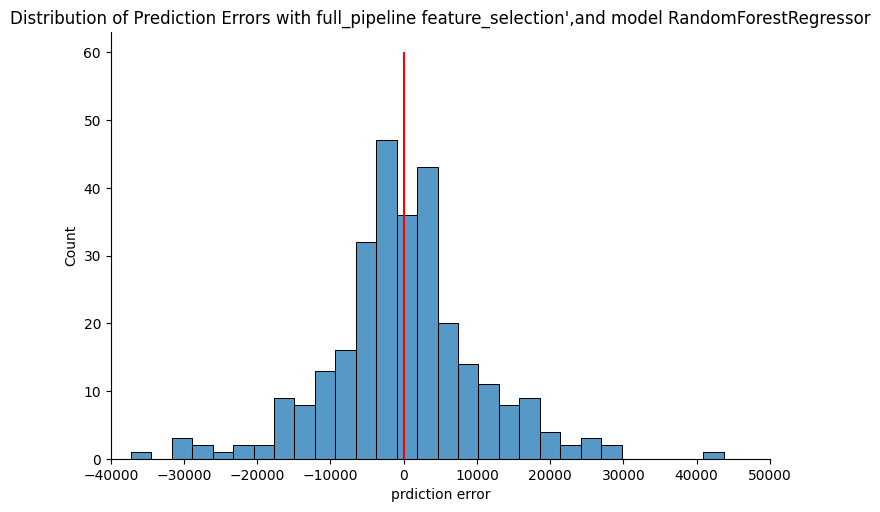

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

RF_predictions = searchRF.predict(X_test)

RF_r2 = r2_score(y_true = y_test,
                 y_pred = RF_predictions)
RF_r2

## Plot
RF_errors_df = X_test.copy()
RF_errors_df["SalePrice"] = y_test
RF_errors_df["prediction"] = RF_predictions
RF_errors_df["error"] = RF_errors_df["prediction"] - RF_errors_df["SalePrice"]
RF_errors_df

sns.displot(RF_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=60,
           color='red')
plt.xlim(-40000,
         50000)


plt.xlabel("prdiction error")


plt.show()

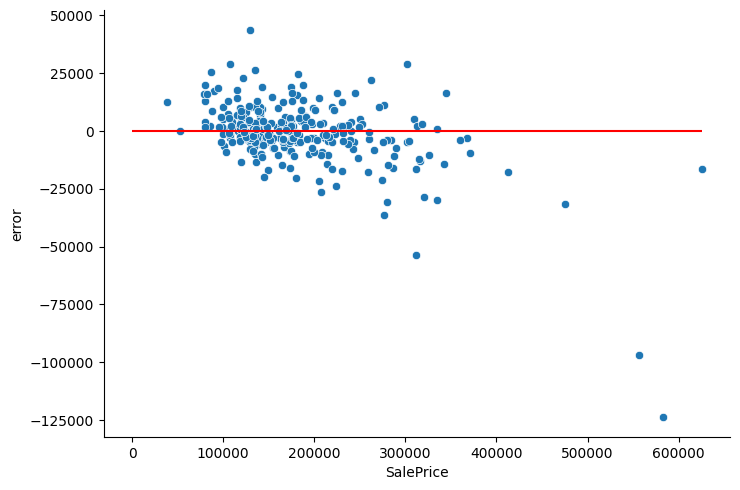

In [32]:
sns.relplot(data=RF_errors_df,
            x='SalePrice',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(RF_errors_df['SalePrice']),
           color='red')
plt.show()

Model Train MAP: 0.05
Model Test MAP : 0.10

Model Train r2: 0.97
Model Test r2 : 0.88

Model Train RMSE: 14612.67
Model Test RMSE : 27227.83

Model Train RSML: 0.08
Model Test RSML : 0.13